In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.tsa.stattools as ts

%matplotlib inline

## Task 1

In [8]:
mtaRides = np.load("MTA_Fare.npy").astype(float)

In [3]:
mtaRides.shape

(600, 23, 194)

In [4]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [9]:
mtaRides[mtaRides == -1] = np.nan

In [11]:
mtastation = np.nanmean(mtaRides, axis=1)

/Users/kaiqu/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [46]:
mtastation.shape

(600, 194)

In [12]:
mtaCards = np.nanmean(mtaRides, axis=0)

In [13]:
time = pd.date_range(start="05/28/2010", end="02/14/2014", freq="W")

In [27]:
def detection(data):
    meanval = np.nanmean(data)
    stdval = np.nanstd(data)
    threshold = [meanval - 3*stdval, meanval + 3*stdval]
    index = np.where((data > threshold[1])|(data < threshold[0]))
    return index

In [28]:
index = detection(np.nanmean(mtastation, axis=0))

In [29]:
detectdate = time[index[0]]

In [30]:
detectdate[0].date()

datetime.date(2012, 10, 28)

## Task 2

In [31]:
mtaCards.shape

(23, 194)

In [39]:
cm = np.zeros(mtaCards.shape)

In [44]:
for i in range(23):
    cm[i,:] = pd.rolling_mean(mtaCards[i,:], 10)

/Users/kaiqu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  from ipykernel import kernelapp as app


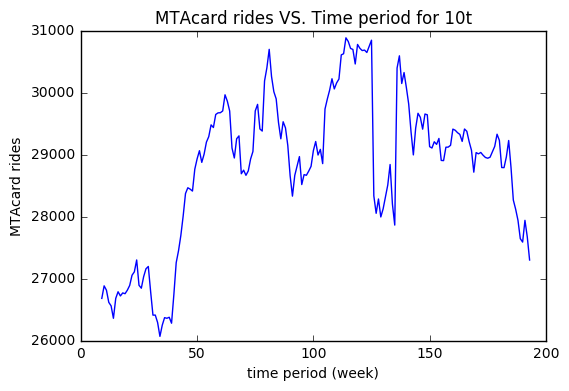

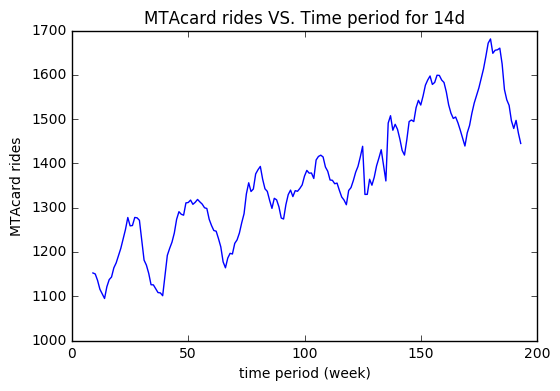

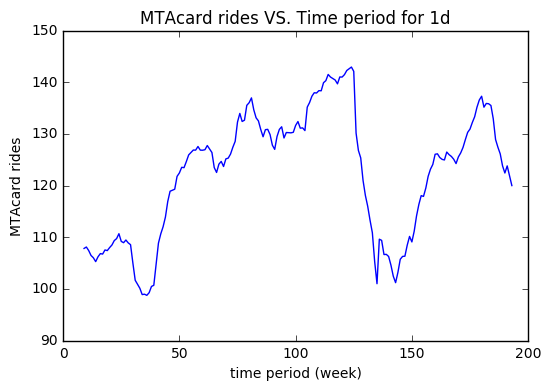

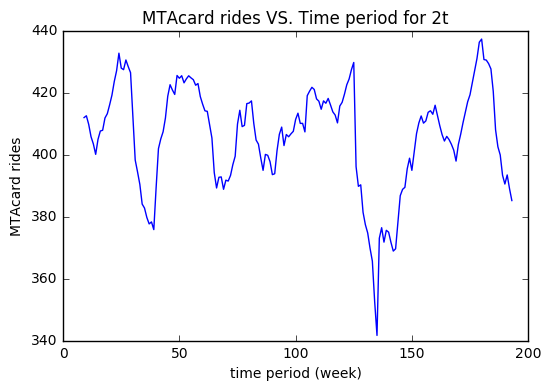

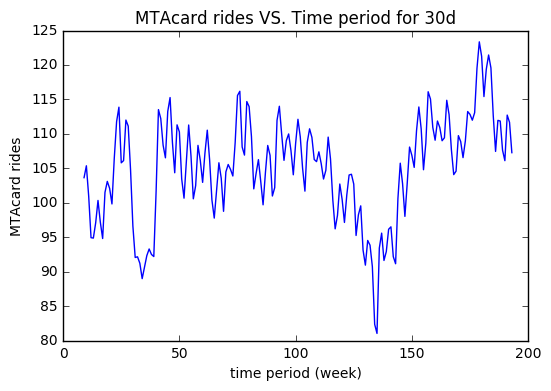

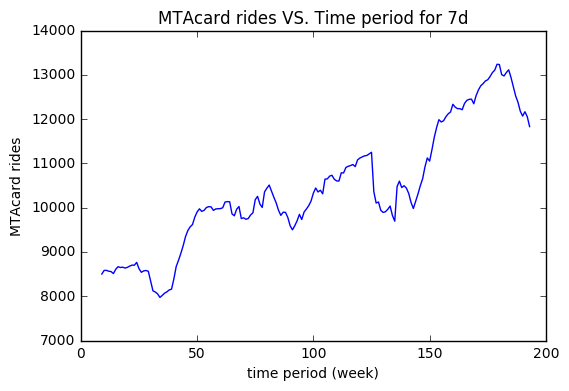

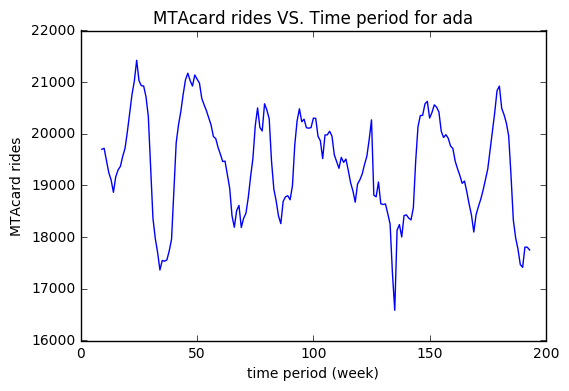

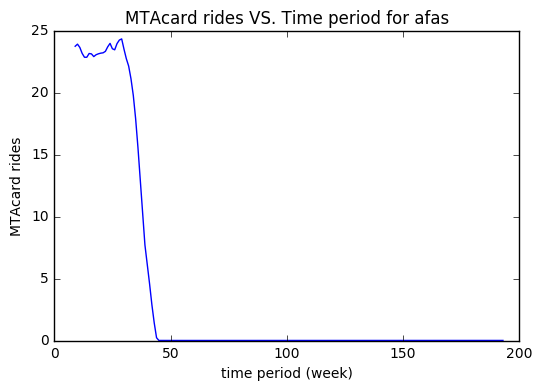

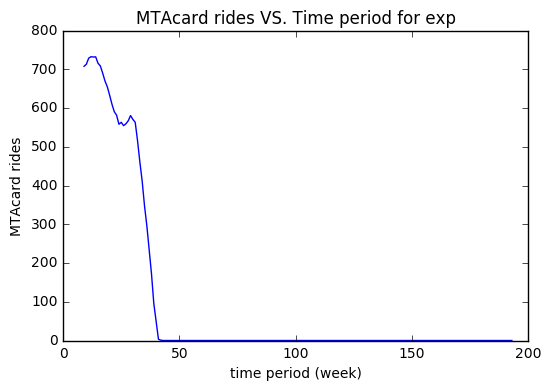

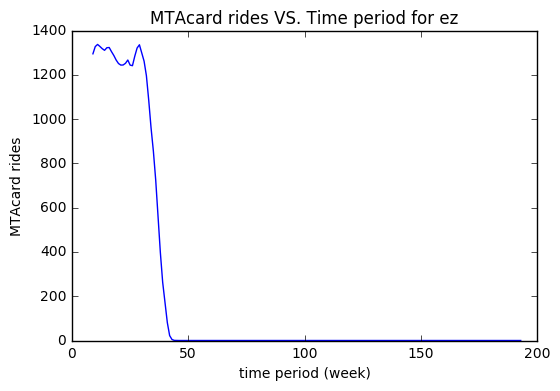

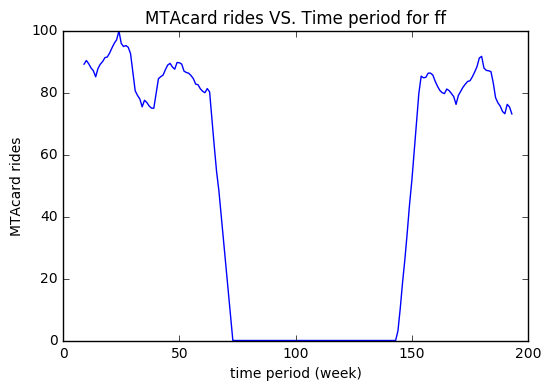

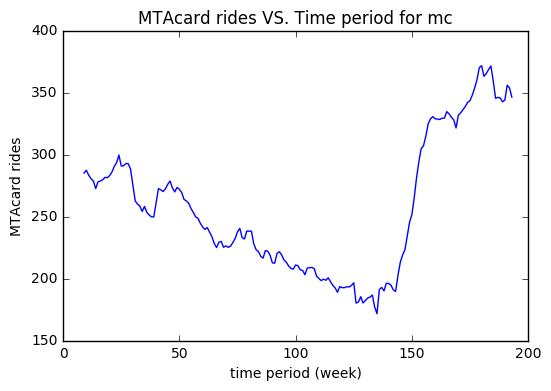

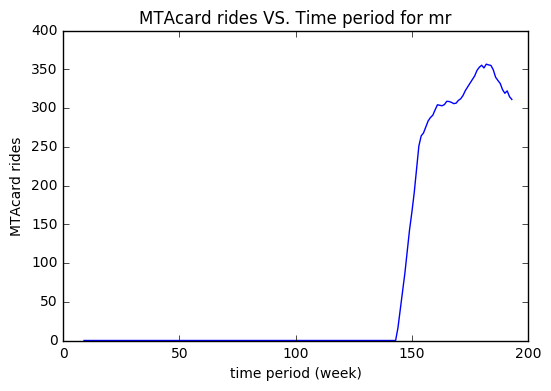

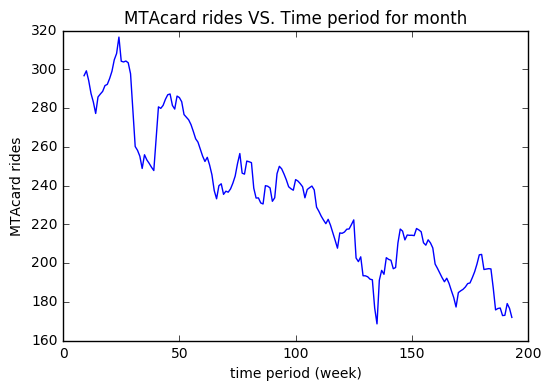

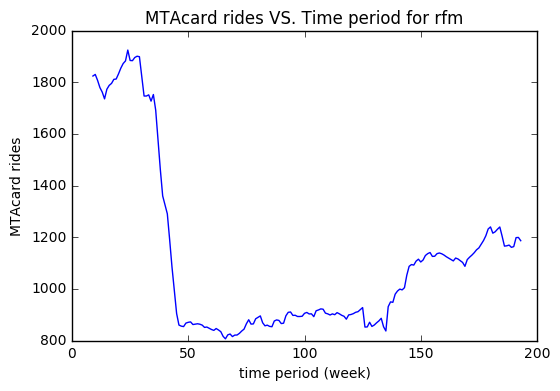

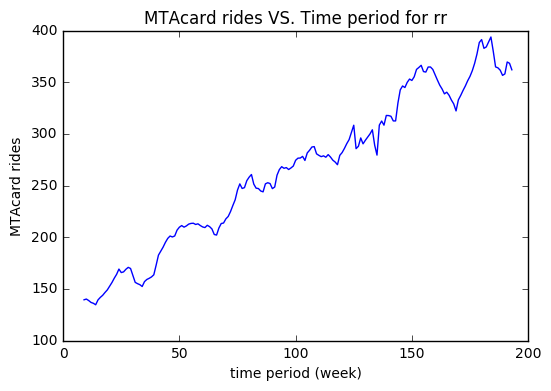

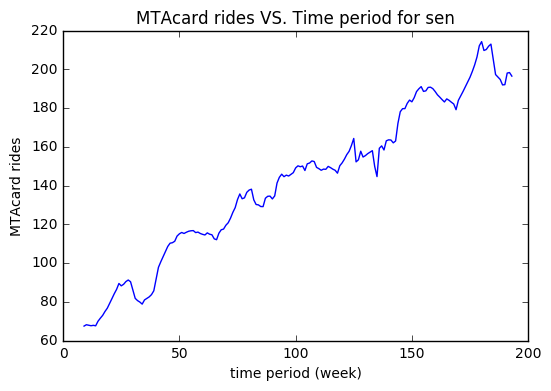

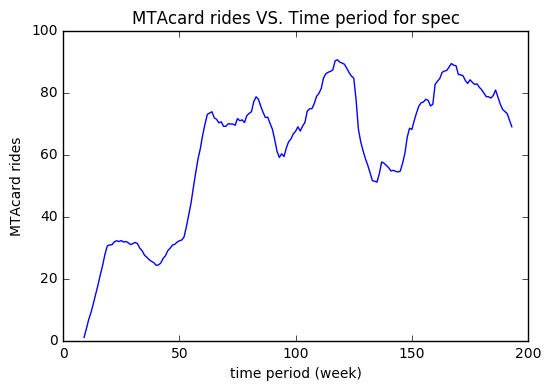

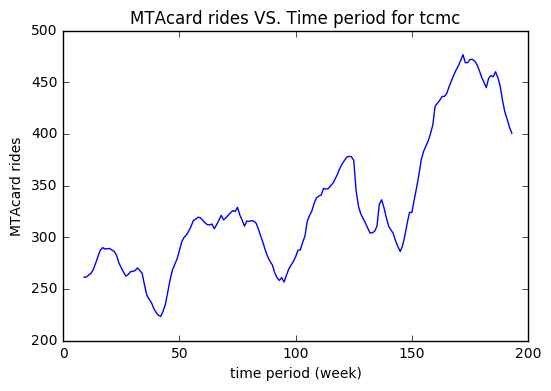

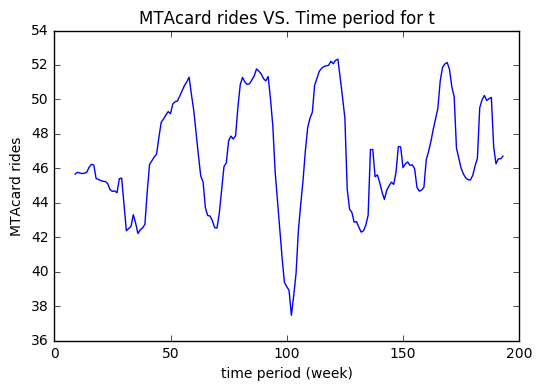

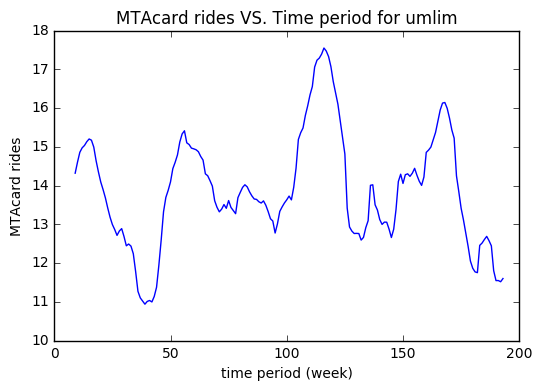

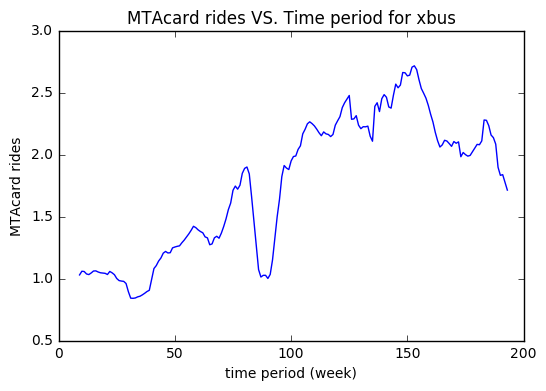

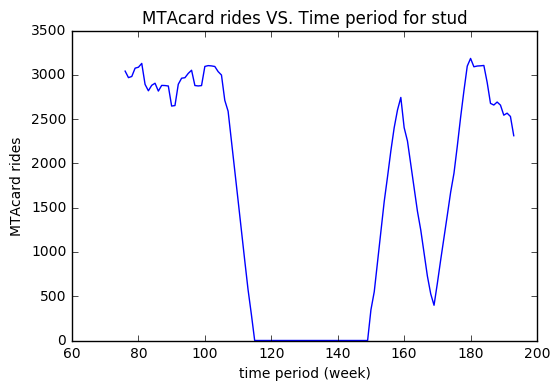

In [162]:
fig = plt.figure(figsize=(10,8))
for i in range(23):
    fig = plt.figure()
    plt.plot(cm[i,:])
    plt.legend(loc="upper left")
    plt.title("MTAcard rides VS. Time period for " + (ridetype[i]))
    plt.xlabel("time period (week)")
    plt.ylabel("MTAcard rides")

## Task 3

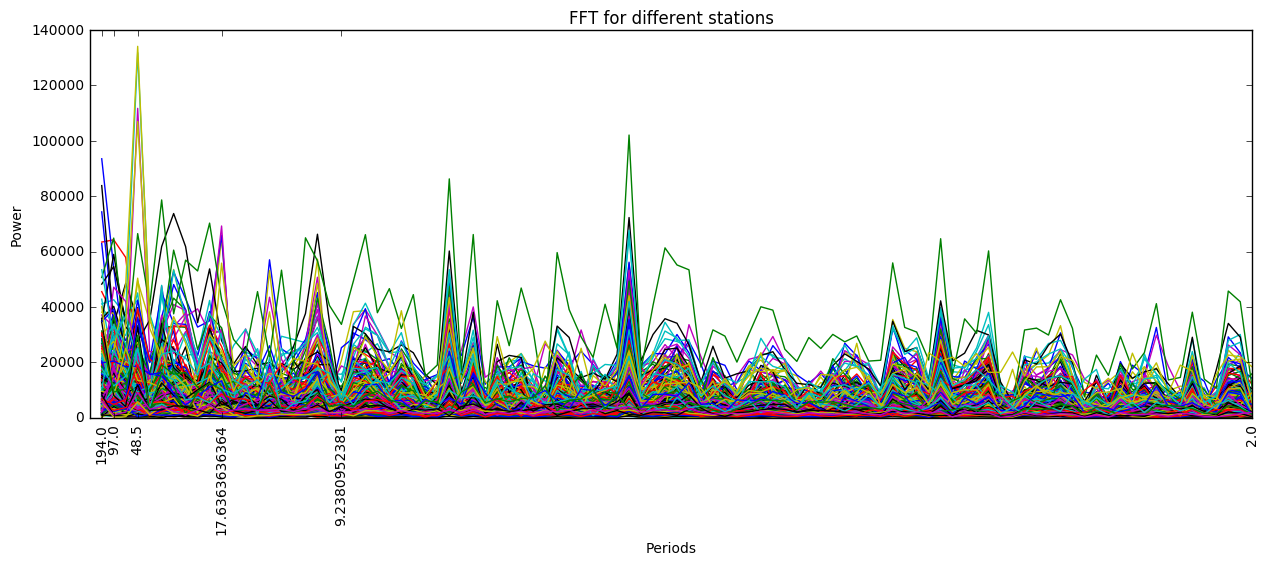

In [121]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
p = []
for i in range(len(mtastation)):
    f = np.abs(np.fft.rfft(mtastation[i,:]))[1:]
    periods = np.fft.rfftfreq(mtastation[i,:].shape[0], 1)[1:]
    p.append(f[3])
    ax.plot(periods, f)    
allperiods = periods[[0, 1, 3, 10, 20, -1]]
ax.set_xticks(allperiods)
ax.set_xticklabels(["%s"%(1/f) for f in allperiods], rotation=90)
ax.set_xlabel("Periods")
ax.set_ylabel("Power")
ax.set_title("FFT for different stations")

In [154]:
p = np.array(p)
p[np.isnan(p)] = 0

In [157]:
station = p.argsort()[-4:]

In [158]:
station

array([327,  32, 150, 194])

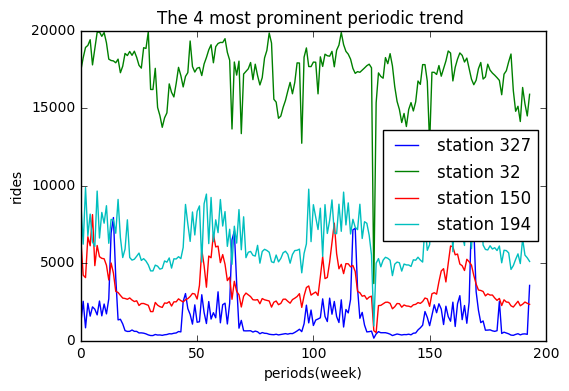

In [160]:
for i in station:
    plt.plot(mtastation[i], label = "station "+str(i))
plt.title("The 4 most prominent periodic trend ")
plt.ylabel("rides")
plt.xlabel("periods(week)")
plt.legend(loc = "best")